**Text Mining in R**

# Basics of Text Analysis

Jan R. Riebling

## Agenda

* Frequencies
* Readability
* Similarity
* Weighting

In [1]:
#install.packages("koRpus", "tidytext")
library(tidyverse)
library(tidytext)
library(tm)
library(koRpus)
library(ggplot2)

── Attaching packages ──────────────────────────────────────── tidyverse 1.3.2 ──
✔ ggplot2 3.3.6      ✔ purrr   0.3.5 
✔ tibble  3.1.8      ✔ dplyr   1.0.10
✔ tidyr   1.2.1      ✔ stringr 1.4.1 
✔ readr   2.1.3      ✔ forcats 0.5.2 
── Conflicts ─────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
Lade nötiges Paket: NLP


Attache Paket: ‘NLP’


Das folgende Objekt ist maskiert ‘package:ggplot2’:

    annotate


Lade nötiges Paket: sylly

For information on available language packages for 'koRpus', run

  available.koRpus.lang()

and see ?install.koRpus.lang()



Attache Paket: ‘koRpus’


Das folgende Objekt ist maskiert ‘package:tm’:

    readTagged


Das folgende Objekt ist maskiert ‘package:readr’:

    tokenize




# Frequencies

## Things to count

* Frequency of types
* Tokens
* Length of tokens
* Syllables
* Sentences
* Length of sentences

In [2]:
corpus <- VCorpus(DirSource("../data/gutenberg/", 
                           pattern=".+\\.txt$"))

In [3]:
names(corpus)

[1] "austen-emma.txt"         "austen-persuasion.txt"  
 [3] "austen-sense.txt"        "bible-kjv.txt"          
 [5] "blake-poems.txt"         "bryant-stories.txt"     
 [7] "burgess-busterbrown.txt" "carroll-alice.txt"      
 [9] "chesterton-ball.txt"     "chesterton-brown.txt"   
[11] "chesterton-thursday.txt" "edgeworth-parents.txt"  
[13] "melville-moby_dick.txt"  "milton-paradise.txt"    
[15] "shakespeare-caesar.txt"  "shakespeare-hamlet.txt" 
[17] "shakespeare-macbeth.txt" "whitman-leaves.txt"

## The "tidy" approach

The facilities of the `tm` package are sufficient for basic counting of word frequencies. However, if we need more custom or finely grained analysis, we reach an impase very fast. Also, a `Corpus` object does not work with most other basic functions.

> We thus define the tidy text format as being a table with **one-token-per-row**. A token is a meaningful unit of text, such as a word, that we are interested in using for analysis, and tokenization is the process of splitting text into tokens.

~ Text Mining with R: A Tidy Approach

## Text as `tibble`

A collection of text can be represented as a `tibble`. However, because of the length of strings the resulting data structure can not be visualized, since most displays would take to long to render the content. This often requires one to "fly blind" and use indirect methods to inspect the data.  

In [4]:
df <- tidy(corpus)

In [5]:
dim(df)
dimnames(df)

[1] 18  8

[[1]]
 [1] "1"  "2"  "3"  "4"  "5"  "6"  "7"  "8"  "9"  "10" "11" "12" "13" "14" "15"
[16] "16" "17" "18"

[[2]]
[1] "author"        "datetimestamp" "description"   "heading"      
[5] "id"            "language"      "origin"        "text"

In [14]:
print(df)

# A tibble: 18 × 8
   author datetimestamp       description heading id       language origin text 
   <lgl>  <dttm>              <lgl>       <lgl>   <chr>    <chr>    <lgl>  <chr>
 1 NA     2022-11-04 07:08:06 NA          NA      austen-… en       NA     "[Em…
 2 NA     2022-11-04 07:08:06 NA          NA      austen-… en       NA     "[Pe…
 3 NA     2022-11-04 07:08:06 NA          NA      austen-… en       NA     "[Se…
 4 NA     2022-11-04 07:08:06 NA          NA      bible-k… en       NA     "[Th…
 5 NA     2022-11-04 07:08:06 NA          NA      blake-p… en       NA     "[Po…
 6 NA     2022-11-04 07:08:06 NA          NA      bryant-… en       NA     "[St…
 7 NA     2022-11-04 07:08:06 NA          NA      burgess… en       NA     "[Th…
 8 NA     2022-11-04 07:08:06 NA          NA      carroll… en       NA     "[Al…
 9 NA     2022-11-04 07:08:06 NA          NA      chester… en       NA     "[Th…
10 NA     2022-11-04 07:08:06 NA          NA      chester… en       NA     "[Th…
11 NA    

## Describing text

Using RegEx and string functions, variety of descriptives can be calculated.

In [6]:
re.token <- "[a-zA-Z0-9]+[-']?[a-zA-Z0-9]*"
df <- mutate(df, 
             AlphanumCount=str_count(text, "\\w"),
             WordCount=str_count(text, re.token),
             SentCount=str_count(text, "[.,;:]"),
             AvgWordSents=WordCount / SentCount)

# df <- df %>% 
#   mutate...

In [13]:
df %>%
  select(id, SentCount, AvgWordSents) %>%
  arrange(desc(AvgWordSents))

id,SentCount,AvgWordSents
<chr>,<int>,<dbl>
burgess-busterbrown.txt,1772,8.976298
chesterton-ball.txt,10287,7.960241
chesterton-brown.txt,9025,7.960000
chesterton-thursday.txt,7509,7.725663
austen-sense.txt,16456,7.269993
austen-persuasion.txt,11605,7.184489
bryant-stories.txt,6474,7.114921
carroll-alice.txt,3833,6.929037
melville-moby_dick.txt,31156,6.861568


## Counting tokens

In [25]:
freq_df <- df %>%
  select(id, text) %>%
  unnest_tokens(token, text) %>%
  count(id, token, sort=TRUE)

Warning message:
“Outer names are only allowed for unnamed scalar atomic inputs”


In [26]:
freq_df

id,token,n
<chr>,<chr>,<int>
bible-kjv.txt,the,64023
bible-kjv.txt,and,51696
bible-kjv.txt,of,34670
melville-moby_dick.txt,the,14431
bible-kjv.txt,to,13580
bible-kjv.txt,that,12912
bible-kjv.txt,in,12667
bible-kjv.txt,he,10419
whitman-leaves.txt,the,10113


## Zipf's law

states that the frequency of a type $n$ is proportional to the inverse of the rank of that type $r$. Including a parameter $\alpha$, this relationship forms a power-law:

$$
n \propto \frac{1}{r^\alpha}
$$

or in its more canonical form

$$
p(r) = Cr^{-\alpha}.
$$


In [29]:
books_df <- freq_df %>%
  group_by(id) %>%
  mutate(total=sum(n),
         TermFreq=n/total,
         title=str_sub(id, end=-5)) %>%
  arrange(desc(n)) %>%
  mutate(rank=row_number()) %>%
  ungroup()

In [31]:
books_df[1:10,]

id,token,n,total,TermFreq,title,rank
<chr>,<chr>,<int>,<int>,<dbl>,<chr>,<int>
bible-kjv.txt,the,64023,852254,0.07512197,bible-kjv,1
bible-kjv.txt,and,51696,852254,0.06065797,bible-kjv,2
bible-kjv.txt,of,34670,852254,0.04068036,bible-kjv,3
melville-moby_dick.txt,the,14431,216155,0.06676228,melville-moby_dick,1
bible-kjv.txt,to,13580,852254,0.01593422,bible-kjv,4
bible-kjv.txt,that,12912,852254,0.01515041,bible-kjv,5
bible-kjv.txt,in,12667,852254,0.01486294,bible-kjv,6
bible-kjv.txt,he,10419,852254,0.01222523,bible-kjv,7
whitman-leaves.txt,the,10113,124335,0.08133671,whitman-leaves,1


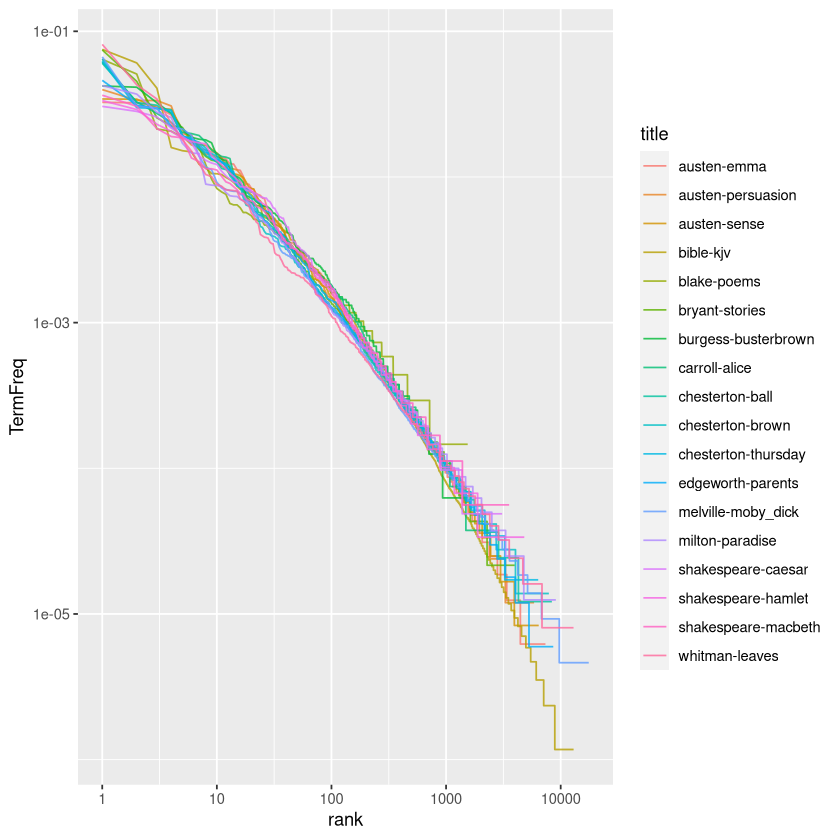

In [33]:
books_df %>%
  ggplot(aes(rank, TermFreq, color=title)) +
    geom_line(alpha=0.8) +
    scale_x_log10() +
    scale_y_log10()

# Readability

## Objective complexity

Readbility scores and indezes try to assess the difficulty in understanding the text by looking at its structural properties. Two different approaches:

* Complexity as a function of the texts properties (e.g. TTR, MTLD).
* Readability as a function of text and language (e.g. SMOG, Flesch-Kincaid). Often mapped to grade levels, by comparison with texts from these specific grades.

## `readability` in `koRpus`

Provides a wide variety of functions to measure the readbility of texts. To see the implemented measurements call `?readbility`. However, these functions depend on a working TreeTagger installation and require a file path to the text documents as input.

## TTR

The original measure of text complexity: the Type-Token-Ratio. It is calculated as the number of types $n(w)$ divided by the number of all tokens in the document $n(t)$:

$$
\text{TTR}_D = \frac{n(w)}{n(t)}
$$

and consequentally takes on values between $0$ and $1$. Whereby higher values are often considered a sign of higher diversity.

In [35]:
books_df %>%
  group_by(id) %>%
  mutate(n.types=n(),
         TTR=n.types/total) %>%
  select(id, TTR) %>%
  summarise(TTR=unique(TTR)) %>%
  arrange(desc(TTR))

id,TTR
<chr>,<dbl>
blake-poems.txt,0.22576400
shakespeare-macbeth.txt,0.19916989
shakespeare-hamlet.txt,0.16206479
shakespeare-caesar.txt,0.15014123
milton-paradise.txt,0.11328647
chesterton-thursday.txt,0.10919570
chesterton-brown.txt,0.10892990
whitman-leaves.txt,0.10412193
chesterton-ball.txt,0.10182888


## Simple Measure of Gobbledygook (Smog)

Developed by Harry McLaughlin (1969). SMOG is widely used in the evaluation of the general readbility of medical documents. The SMOG index expresses readbility as the minimum number of school years necessary to understand the text.  

$$
\text{SMOG}_D = 1.0430 \sqrt{\mathrm{polysyl}_D {30 \over s_D} } + 3.1291
$$

Whereby $s_D$ denotes the number of sentences in the text, while $\text{polysyl}_D$ stands for the number of words with more then three syllables.

In [36]:
?koRpus::readability

# Similarity

In [38]:
install.packages("lsa")
library(lsa)

Installiere Paket nach ‘/home/jrriebling/.local/lib/R’
(da ‘lib’ nicht spezifiziert)

Lade nötiges Paket: SnowballC


Attache Paket: ‘lsa’


Das folgende Objekt ist maskiert ‘package:koRpus’:

    query




## The vectorspace model

Proposed by Gerard Salton (1979) as one possible model of information retrieval. Text is represented as a vector of word frequencies. This allows for the use of linear algebra to compare vectors with each other and with query vectors.

> Vector space models have attractive qualities: processing vector spaces is a manageable implementational framework, they are mathematically welldefined and understood, and they are intuitively appealing, conforming to everyday metaphors such as “near in meaning”. In this way, vector spaces can be interpreted as a model of meaning, as semantic spaces. (Karlgren 2008:531)

## Salton's Cosine

It is not the length of the vector that counts, but its rotation in n-dimensional space. The cosine measure calculates the cosine of the angle between two vectors. It takes on a value of $0$ for orthogonal vectors (dissimilarity) and $[1,-1]$ for parallel vectors (similarity) 
 
$$
\cos_i(Q, d_i) = 
\frac{Q \cdot d_i}{|{Q}|\,|{d_i}|} =
\frac{\sum^{t}_{j=1}{a_{ij} q_j}}{ \sqrt{\sum^{t}_{j=1}{a_{ij}^2}} \sqrt{\sum^{t}_{j=1}{q_j^2}}}.
$$

In [39]:
dtm <- freq_df %>%
  spread(token, n, fill=0) %>%
  select(-1)

mat <- as.matrix(dtm)

In [40]:
cosine(t(mat))

1.0000000,0.9734593,0.9776484,0.7798336,0.7908751,0.8511897,0.8128633,0.8835090,0.8750426,0.8693141,0.8611004,0.9515135,0.8466316,0.8299200,0.8356140,0.8617466,0.8611511,0.7893346
0.9734593,1.0000000,0.9764619,0.8288708,0.8268466,0.8859412,0.8313164,0.8964627,0.9047839,0.9021303,0.8891418,0.9536692,0.8906722,0.8717844,0.8073765,0.8447292,0.8599206,0.8247650
0.9776484,0.9764619,1.0000000,0.7922494,0.7980978,0.8516261,0.8003011,0.8823619,0.8758615,0.8701873,0.8596356,0.9497843,0.8602212,0.8528902,0.8200741,0.8561959,0.8584723,0.7986365
0.7798336,0.8288708,0.7922494,1.0000000,0.9172228,0.9026732,0.7576115,0.8272517,0.8989744,0.8871145,0.8807305,0.8533382,0.9143971,0.8904458,0.7760949,0.8080121,0.8561580,0.9288922
0.7908751,0.8268466,0.7980978,0.9172228,1.0000000,0.9165966,0.7500430,0.8504352,0.8954684,0.8965702,0.8834176,0.8618506,0.9113216,0.8907821,0.7887410,0.8268508,0.8696636,0.9349012
0.8511897,0.8859412,0.8516261,0.9026732,0.9165966,1.0000000,0.8708003,0.9308200,0.9475925,0.9540935,0.9429821,0.9339272,0.9395193,0.8510538,0.7779919,0.8204202,0.8516616,0.9037634
0.8128633,0.8313164,0.8003011,0.7576115,0.7500430,0.8708003,1.0000000,0.7905730,0.8545551,0.8595184,0.8554429,0.8603952,0.8163142,0.7590990,0.7259463,0.7491315,0.7620255,0.7210956
0.8835090,0.8964627,0.8823619,0.8272517,0.8504352,0.9308200,0.7905730,1.0000000,0.9165032,0.9151994,0.9057637,0.9309375,0.9026407,0.8005253,0.7699971,0.8199510,0.8337826,0.8662063
0.8750426,0.9047839,0.8758615,0.8989744,0.8954684,0.9475925,0.8545551,0.9165032,1.0000000,0.9860439,0.9858715,0.9430391,0.9695776,0.8627926,0.8126159,0.8586474,0.8784832,0.9135271
0.8693141,0.9021303,0.8701873,0.8871145,0.8965702,0.9540935,0.8595184,0.9151994,0.9860439,1.0000000,0.9865119,0.9397345,0.9709463,0.8500212,0.7929837,0.8436303,0.8641507,0.9075839
0.8611004,0.8891418,0.8596356,0.8807305,0.8834176,0.9429821,0.8554429,0.9057637,0.9858715,0.9865119,1.0000000,0.9375160,0.9624164,0.8380321,0.8048091,0.8481034,0.8675627,0.9006443


In [41]:
cosine(mat[1,], mat[2,])

0.9734593


# Weighting

## TFiDF

Combines the frequency of a specific type in a document with its inverse document frequency. The latter decreases the weight of a token in a text, by the amount of appearence of the tokens type in other documents. TFiDF has become the most popular term-weighting scheme in text analysis. 

$$
\text{tf}\text{idf}(t, d_i, D) = f(t, d_i) \log \left( \frac{N}{n_t} \right).
$$

In [21]:
# starting from the original df
tfidf <- freq_df %>%  
  bind_tf_idf(token, id, n)

In [22]:
tfidf

id,token,n,tf,idf,tf_idf
bible-kjv.txt,the,64023,0.075121971,0.00000000,0.0000000000
bible-kjv.txt,and,51696,0.060657973,0.00000000,0.0000000000
bible-kjv.txt,of,34670,0.040680361,0.00000000,0.0000000000
melville-moby_dick.txt,the,14431,0.066762277,0.00000000,0.0000000000
bible-kjv.txt,to,13580,0.015934217,0.00000000,0.0000000000
bible-kjv.txt,that,12912,0.015150413,0.00000000,0.0000000000
bible-kjv.txt,in,12667,0.014862940,0.00000000,0.0000000000
bible-kjv.txt,he,10419,0.012225229,0.00000000,0.0000000000
whitman-leaves.txt,the,10113,0.081336711,0.00000000,0.0000000000
bible-kjv.txt,shall,9838,0.011543507,0.05715841,0.0006598085


In [23]:
## Let's take a look

tfidf %>%
  select(id, token, tf_idf) %>%
  arrange(desc(tf_idf))

id,token,tf_idf
burgess-busterbrown.txt,buster,0.030545673
carroll-alice.txt,alice,0.025914986
chesterton-thursday.txt,syme,0.024194264
shakespeare-macbeth.txt,macb,0.022209935
shakespeare-caesar.txt,bru,0.021536324
chesterton-ball.txt,turnbull,0.017854818
shakespeare-caesar.txt,brutus,0.017227679
shakespeare-caesar.txt,cassi,0.015061351
austen-sense.txt,elinor,0.015010725
chesterton-ball.txt,macian,0.014550974


In [ ]:
dtm.mat <- tfidf %>%
  spread(token, n, fill=0) %>%
  select(-1) %>%
  as.matrix()

cosmat <- cosine(dtm.mat)

# References

* Salton, Gerard. 1979. “Mathematics and Information Retrieval.” Journal of Documentation 35 (1): 1–29.
* Dubin, David. 2004. “The Most Influential Paper Gerard Salton Never Wrote.” Library Trends 52 (4): 748–64.
* Robertson, Stephen. 2004. “Understanding Inverse Document Frequency: On Theoretical Arguments for IDF.” Journal of Documentation 60 (5): 503–520.
